In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
run_student_code = False

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(str(Path('../../')))


In [4]:
if run_student_code:
    from exercises.camera_calibration.calibrated_lane_detector import CalibratedLaneDetector, get_intersection, get_py_from_vp
else:
    from solutions.camera_calibration.calibrated_lane_detector import CalibratedLaneDetector, get_intersection, get_py_from_vp

In [15]:
# TODO: Change the next line(s), to create an instance of *your* LaneDetector
model_path = Path("../../solutions/lane_detection/best_model_multi_dice_loss.pth")
cld = CalibratedLaneDetector(model_path=model_path)

## Test on an image

Let us load an image

(512, 1024, 3)

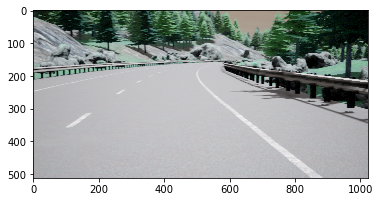

In [7]:
# TODO: Change to another picture for which we know pitch and yaw. Maybe should have pitch -4, and yaw 2.5 
image_fn = str(Path("../../../data/Town04_Clear_Noon_09_09_2020_14_57_22_frame_625_validation_set.png"))
image = cv2.imread(image_fn)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape

First we detect the left and right boundaries as usual

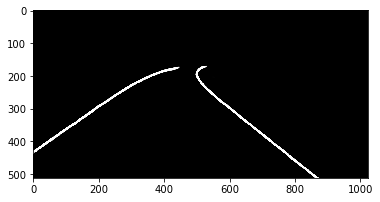

In [8]:
_, left_probs, right_probs = ld.detect(image)
# just to visualize both detections (left and right) in one image we add them up
plt.imshow(left_probs + right_probs, cmap="gray")

Next we fit straight lines to the left and right boundary

In [9]:
line_left  = cld._fit_line_v_of_u(left_probs)
line_right = cld._fit_line_v_of_u(right_probs)

Let us visualize the straight lines

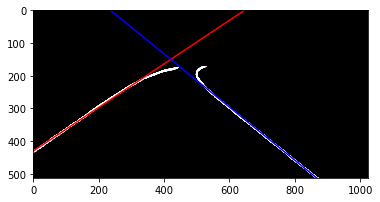

In [10]:
def plot_detected_lines(line_left, line_right):
    u = np.arange(0,ld.cg.image_width, 1)
    v_left = line_left(u)
    v_right = line_right(u)

    plt.plot(u,v_left, color='r')
    plt.plot(u,v_right, color='b')
    plt.xlim(0,ld.cg.image_width)
    plt.ylim(ld.cg.image_height,0)

plt.imshow(left_probs + right_probs, cmap="gray")
plot_detected_lines(line_left, line_right)

Now compute the vanishing point

In [11]:
vanishing_point = get_intersection(line_left, line_right)
print(vanishing_point)

(420.4543509597447, 149.80830163934115)


Visualize the vanishing point

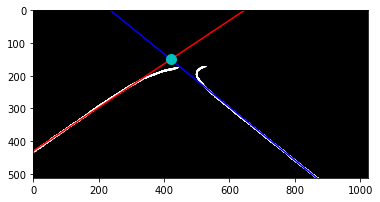

In [12]:
u_i, v_i = vanishing_point
plt.scatter([u_i],[v_i], marker="o", s=100, color="c", zorder=10)
plt.imshow(left_probs + right_probs, cmap="gray")
plot_detected_lines(line_left, line_right)


Finally determine pitch and yaw

In [13]:
pitch, yaw = get_py_from_vp(u_i, v_i, ld.cg.intrinsic_matrix)
print("pitch = ", np.rad2deg(pitch))
print("yaw = ",  np.rad2deg(yaw))

pitch =  -4.896891493371568
yaw =  4.235673993456686


## Test on a video

In [17]:
# for image in video:
#   ld.calibrate(video)

filename = Path("../../../data/calibration_video.mp4")

cap = cv2.VideoCapture(str(filename))
while cap.isOpened():
    ret, image = cap.read()
    if not ret:
        cap.release()
        break
    cld(image[:,:,::-1])

yaw, pitch =  -1.9560379050724384 -5.005290508385112
yaw, pitch =  -1.9916382836933144 -5.009272080875993
yaw, pitch =  -1.9753659176735066 -4.998666448407471
yaw, pitch =  -1.965975162174022 -4.994253878561065
yaw, pitch =  -1.9723851559235002 -4.999744444618145
yaw, pitch =  -1.9743524062143645 -5.005242336836756
yaw, pitch =  -1.9781585871628358 -5.011440785090434
yaw, pitch =  -1.981259579559202 -5.012155097977481
yaw, pitch =  -1.9857572279415885 -5.015467120373343
yaw, pitch =  -1.9884672333414453 -5.015692046186916
yaw, pitch =  -1.9900472367217479 -5.015487936097379
yaw, pitch =  -1.9959562505400645 -5.011935223349733
yaw, pitch =  -1.9967406791149498 -5.012697837942035
yaw, pitch =  -1.9983721382653807 -5.0121932656545924
yaw, pitch =  -2.004862489991003 -5.012096610626423
yaw, pitch =  -2.006575830667212 -5.0120092720364395
yaw, pitch =  -2.0069063929753725 -5.011707038738194
yaw, pitch =  -2.0087529500968713 -5.014397536989873
yaw, pitch =  -2.0134576309122245 -5.01397726653

KeyboardInterrupt: 